## Codage des données : les nombres à virgule flottante : float

# Nombres normalisés selon la norme IEEE 754

Pour des raisons de simplification, nous limiterons l'étude des nombres à virgule flottante à 32 bits, soit les nombres à simple précision tel que le prévoit la norme IEEE 754 sur l'arithmétique à virgule flottante.  
[Ref : https://fr.wikipedia.org/wiki/IEEE_754]

## 1 - Notion mathématique
En dehors des cas particuliers (Cf 4-Cas Particuliers : 0, ±∞, ...), les valeurs dites "normalisées" d'un nombre à virgule flottante (réel) peuvent s'exprimer comme le produit de deux nombres :
- le premier égal à **1,...** reste à définir la partie décimale comme une somme de fractions où les dénominateurs sont des puissances de 2. Cette partie décimale est appelée **la mantisse** du nombre normalisé.
- le deuxième une puissance de 2 qui peut être négative ou positive. Cette partie est appelée **l'exposant**. 
>*exemples :*  
*$345,34 = 1,369140625 \times 2^7 $ soit $ [ 1 + \textit{0,369140625} ] \times 2^7$*  
*$-0,0556640625 = -1,78125 \times 2^{-5} $ soit $ - [ 1 + \textit{0,78125} ] \times 2^{-5}$*   


## 2 - Implémentation en codage binaire Norme IEEE 754
Le codage des nombres à virgule flottante sur 32 bits est composé de trois parties :
- le bit de poids fort : **bit de signe**,
- les 8 bits suivants : le codage correspondant à l'**exposant de la puissance de 2** par rapport à 127 (décalage)
- les 23 bits restants : **la mantisse**. C'est le codage binaire associé à la somme des fractions dont les dénominateurs sont des puissances de 2.  

###### Le Bit de signe : 0 ou 1
Comme pour les entiers relatifs, \[ 1 \] signifie que le nombre est négatif, \[ 0 \], il est positif.  

###### L'Encodage de l'exposant  de  2 <sup>n</sup> : exp = 127 ± n
La puissance de 2 est codée sur 8 bits et elle doit pouvoir être négative ou positive. Son codage se fait donc par rapport à la moitié de 255 (valeur maximale avec 8 bits) soit un décalage de 127 ( 255 / 2 ).  
Ainsi l'exposant, qui correspond à la puissance de 2, sera égal à **exposant = 127 ± la puissance de 2** du nombre à virgule flottante.  
*exemples :*   
$2^\mathbf{7}$ -> exposant $= 127 \mathbf{+ 7}$ la valeur encodée sera donc 134 soit *0b* 1000 0110   
$2^\mathbf{-5}$ -> exposant $= 127 \mathbf{- 5}$ la valeur encodée sera donc 122 soit *0b* 0111 1010

######  Mantisse : Code binaire d'une somme de fractions 
Comme expliqué précédemment, les nombres à virgule flottante normalisés peuvent être exprimés sous la forme du produit de deux nombres $1,\textit{mantisse} \times 2^n$. Pour encoder la mantisse, le principe consiste à retenir le code binaire associé à la somme des fractions dont les dénominateurs sont des puissances de 2.  

Sachant que la mantisse est limitée à 23 bits dans le cas d'une précision simple *(32 bits au total)* on peut exprimer la mantisse de la façon suivante : mantisse = $\sum\limits_{i=1}^{23} \mathbf{b}_{\textbf{i}} \times \frac{1}{2^i}$ où $\mathbf{b}_{\textbf{i}}$ est un bit égal à **0** ou **1**.  
*exemple :*
$1,625 = 1 + 0,5 + 0,125$ ce qui peut donc s'écrire : $1,75 = 1 + [ \mathbf{1} \times\frac{1}{2^1} + \mathbf{0} \times\frac{1}{2^2} + \mathbf{1} \times\frac{1}{2^3} + \mathbf{0} \times\frac{1}{2^4} + ... + \mathbf{0} \times\frac{1}{2^{23}}$  
Pour $1,625$, la mantisse sur 23 bits sera $\textit{0b}101 0000 0000 0000 0000 0000$.     

**Note importante :** Un nombre à virgule flottante **normalisé** est toujours exprimé sous la forme **1**,... Le **1** est toujours présent, il n'est donc pas pris en compte dans l'encodage. Seule la partie décimale correspond à la mantisse.   

Si la mantisse ne contient que 23 bits, la précision maximale est donc de $\frac{1}{2^{23}}$. Par conséquent **l'encodage d'un nombre à virgule flottante est souvent une approximation de la valeur exacte** (voir Exercice 3 : Un piège à éviter ...)


#### Valeurs limites des nombres "normalisés"

La limite de précision possible est déterminée par les limites calculables de l'exposant et de la mantisse.  

Pour une simple précision, la puissance de 2 est encodée sur 8 bits avec un décalage de 127 pour pouvoir exprimer des puissances de 2 négatives ou positives. Les valeurs 0 et 255 sont réservées pour les nombres dits "dénormalisés" (voir 4 - Cas particuliers).  
Donc les limites pour l'exposant seront :
- **1** pour $2^{ -126}$ *(127-126)* soit exposant = ${\textit{0b}0000 0001}$
- **254** pour $2^{127}$ *(127+127)* soit exposant = ${\textit{0b}1111 1110}$

Les valeurs normalisées sont donc comprises entre :  
- pour la borne inférieure avec les 23 bits de la mantisse à 0 et une puissance de 2 égale à -126 :  $\mathbf{1,}\mathit{[0b0000...00]} \times 2^{-126} = 1,1754943508222875 \times 10^{-38}$,    
- pour la borne supérieure, les 23 bits de la mantisse à 1 soit $\mathbf{1,}\mathit{[0b1111...11]} = 1.9999998807907104$, et la puissance de 2 égale à +127. Donc la borne supérieure est égale à $1.9999998807907104 \times 2^{127} = 3.4028234663852886 \times 10^{+38}$.  

On peut donc en conclure que les valeurs absolues des nombres dits "normalisés" sont comprises dans l'intervalle $[ 1,1754943508222875 \times 10^{-38} ; 3.4028234663852886e+38 ]$.



## 3 - Exemples
<br>

<span style="background:#BBFFBB; color:#0000FF; font-family: Verdana, Geneva, sans-serif; font-size: 1.2em">
    <b>Exemple 1 : binaire vers float</b>
</span>  

On donne le code binaire d'un float : 
<span style="color:#AA4422;"><b> 1 </b></span> 
<span style="color:#4422AA;"><b> 0111 1100 </b></span>
<span style="color:#22AA44;"><b> 010 11000 00000 00000 00000</b></span>   

**1-Bit de signe :** : <span style="color:#AA4422;"><b> 1 </b></span>  
C'est donc un nombre négatif => **-1,**  

**2-Puissance :**  
<span style="color:#4422AA;"><b> 0111 1100 </b></span> soit 124.
La puissance de 2 : $127 + puissance = 124$, la puissance a donc pour valeur -3 -> **2**<sup> **-3**</sup>  

**3-Mantisse :**
<span style="color:#22AA44;"><b> 010 11000 00000 00000 00000</b></span>  
$\mathbf{0} \times \frac{1}{2^1} + \mathbf{1} \times \frac{1}{2^2} + \mathbf{0} \times \frac{1}{2^3} + \mathbf{1} \times \frac{1}{2^4} + \mathbf{1} \times \frac{1}{2^5} + \mathbf{0} \times \frac{1}{2^6} + \mathbf{0} \times \frac{1}{2^7} + ...$  
Ce qui peut s'ecrire : $... + 0,25 + ... + 0,0625 + 0,03125 + ... + ... + ... = \mathbf{0.34375} $  

**CONCLUSION :**  

Le code binaire d'un float : 
<span style="color:#AA4422;"><b> 1 </b></span> 
<span style="color:#4422AA;"><b> 0111 1100 </b></span>
<span style="color:#22AA44;"><b> 010 11000 00000 00000 00000</b></span>   
correspond au nombre :
<span style="color:#AA4422;"><b> - </b></span> 
**1,**<span style="color:#22AA44;"><b>34375</b></span> $ \times $ 2<sup><span style="color:#4422AA;"><b> -3 </b></span></sup> soit **$ = \mathbf{- 0,16796875} $**

<span style="background:#BBFFBB; color:#0000FF; font-family: Verdana, Geneva, sans-serif; font-size: 1.2em">
    <b>Exemple 2 : float vers binaire</b>
</span>  

On donne le nombre 371,25

**1-Mettre en évidence les trois parties de l'encodage**  
Exprimer le nombre sous la forme $± 1,mantisse \times 2^{ puissance }$.  
Diviser 371,25 par 2^1, 2^2, 2^3, 2^4, ... jusqu'à l'obtention d'un nombre compris entre 1 et 2 ( -> 1,... ).   
$\frac{371,25}{2^8} = 1,4501953125$  
donc $\mathbf{371,25 = 1,4501953125 \times 2^8}$

**2- Bit de signe**  
Le nombre est positif, le bit de signe sera 
<span style="color:#AA4422;"><b> 0 </b></span> 

**2- Exposant de la puissance de 2**  
L'exposant de la puissance de 2 sera 127 + 8 soit 135 => *0b* 
<span style="color:#4422AA;"><b> 1000 0111 </b></span>

**3- Mantisse**   
Jusqu'à ce que la valeur soit inférieure à $\frac{1}{2^{23}}$, soustraire à la partie décimale, des fractions dont les dénominateurs sont des puissances de 2 :  
partie décimale : 0,4501953125 *(rappel le **1,** n'est pas pris en compte)*
- $ \frac{1}{2^1} = 0,5 $ -> trop grand => 1er bit à **0** *\[ pas de soustraction, reste 0,4501953125 \]*
- $ \frac{1}{2^2} = 0,25 $ -> OK => 2eme bit à **1** *\[ soustraire la fraction : 0,4501953125 - 0,25 reste 0,2001953125 \]*
- $ \frac{1}{2^3} = 0,125 $ -> OK => 3eme bit à **1** *\[ soustraire la fraction : 0,2001953125 - 0,125 reste 0,0751953125 \]*
- $ \frac{1}{2^4} = 0,0625 $ -> OK => 4eme bit à **1** *\[ soustraire la fraction : 0,0751953125 - 0,0625 reste 0,0126953125 \]*
- $ \frac{1}{2^5} = 0,03125 $ -> trop grand => 5eme bit à **0** *\[ pas de soustraction, reste 0,0126953125 \]*
- $ \frac{1}{2^6} = 0,015625 $ -> trop grand => 6eme bit à **0** *\[ pas de soustraction, reste 0,0126953125 \]*
- $ \frac{1}{2^7} = 0,0078125 $ -> OK => 7eme bit à **1** *\[ soustraire la fraction : 0,0126953125 - 0,0078125 reste 0,0048828125 \]*
- $ \frac{1}{2^8} = 0,00390625 $ -> OK => 8eme bit à **1** *\[ soustraire la fraction : 0,0048828125 - 0,00390625 reste 0,0009765625 \]*
- $ \frac{1}{2^9} = 0,001953125 $ -> trop grand => 9eme bit à **0** *\[ pas de soustraction, reste 0,0009765625 \]*
- $ \frac{1}{2^{10}} = 0.0009765625 $ -> BINGO c'est égal au reste -> 10eme bit à **1** ! *\[ soustraire la fraction : 0,0009765625 - 0,0009765625 = 0 \]*  
Le reste est nul donc les 13 autres bits de la mantisse seront à 0 \]  

Valeur de la mantisse : *0b* 
<span style="color:#22AA44;"><b> 011 10011 01000 00000 00000</b></span>.

**CONCLUSION :**  

Le code binaire de 371,25 codé sur 32 bits sera *0b*
<span style="color:#AA4422;"><b> 0 </b></span> 
<span style="color:#4422AA;"><b> 1000 0111 </b></span>
<span style="color:#22AA44;"><b> 011 10011 01000 00000 00000</b></span>   



## 4 - Cas particuliers : 0, ±1, ±∞, 10<sup>-45</sup>< x < 10<sup>-38</sup>, NaNs

###### La valeur 0
\[*0* 0000 0000 000 00000 00000 00000 00000\]  
**La valeur 0** est codée avec tous les bits de l'exposant et de la mantisse à 0.  
Selon le bit de signe on peut donc avoir ±0 !  

###### Les valeurs ±1
\[*0* **0**111 1111 000 00000 00000 00000 00000\]  
**Les valeurs -1 et +1** sont codées avec la valeur 127 pour l'exposant et les 23 bits de la mantisse à 0.  
Selon le bit de signe on peut donc avoir ±1.  
  
*Pour information :*  

###### Les valeurs ±∞
\[*0* **1**111 1111 000 00000 00000 00000 00000\]  
**Les valeurs ±∞** sont codées avec tous les bits de l'exposant à 1 (255), et tous les bits de la mantisse à 0.  

###### Les nombres dénormalisés : ~ 1,4 x 10 <sup> -45</sup> <  ... <  ~ 1,17 x 10 <sup> -38</sup>**
\[ *0* **0000 0000** ... ..... ..... ..... ..... \] *(au moins un bit à 1 dans la mantisse)*    
 
C'est le cas lorsque tous les bits de l'exposant sont nulls, et qu'il y a au moins un bit à 1 dans la mantisse.   

Dans ce cas, les 23 bits de la mantisse sont toujours utilisés pour coder la somme de fractions avec des dénominateurs égaux à des puissances de 2 (Cf mantisse des nombres normalisés), mais le nombre dénormalisé est exprimé sous la forme $\mathbf{0,}\textit{mantisse} \times 2^{-126}$ pour déterminer le codage de la mantisse.

Leur valeur absolue est comprise dans l'intervalle :
- borne inférieure : $\mathbf{0,}\mathit{0b000...1}\} \times 2^{-126}$ soit la plus petite fraction $ \frac{1}{2^{23}} \times 2^{-126} = \mathbf{ 1,40129846432 \times 10^{-45} }$,  
- borne supérieure : $\mathbf{0,}\mathit{0b111...1}\} \times 2^{-126}$ soit $(\frac{1}{2^1} + \frac{1}{2^2} + ... + \frac{1}{2^{22}} + \frac{1}{2^{23}}) \times 2^{-126}$ donc $ \mathbf{ 1,17549421069 \times 10^{−38} }$.    

###### Not a Number
\[ *0* **1111 1111** ... ..... ..... ..... ..... \] *(au moins un bit à 1 dans la mantisse)*    
Si tous les bits de l'exposant sont à 1 et et qu'il y a au moins un bit à 1 dans la mantisse,  
alors ce n'est pas un nombre : Not A Number au sens arithmétique de la norme IEEE 754.  

## 5 - Exercices
<br>
<p style="background:#BBFFFF; color:#0000FF; font-family: Verdana, Geneva, sans-serif; font-size: 1.3em">
    <b>Exercice 1 : bin to float</b>
</p>

Calculer la valeur du nombre à virgule flottante correspondant au codage binaire indiqué ci-dessous :

In [ ]:
# Convertir l'encodage binaire [1, 0,1,1,1, 1,0,0,1, 1,0,1, 1,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0]
# en nombre à virgule flottante
< ... >

  <details>
    <summary style="cursor: pointer; background:#ddd;">Solution n°1 ⌄</summary>
    -0.02685546875
  </details>

In [ ]:
# Convertir l'encodage binaire [0, 1,0,0,0, 1,1,0,1, 1,1,0, 0,1,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0]
# en nombre à virgule flottante
< ... >

  <details>
    <summary style="cursor: pointer; background:#ddd;">Solution n°2 ⌄</summary>
    29440.0
  </details>

In [ ]:
# Convertir l'encodage binaire [1, 0,1,1,1, 1,1,1,1, 0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0]
# en nombre à virgule flottante
< ... >

  <details>
    <summary style="cursor: pointer; background:#ddd;">Solution n°3 ⌄</summary>
    -1.0
  </details>

<br>
<p style="background:#BBFFFF; color:#0000FF; font-family: Verdana, Geneva, sans-serif; font-size: 1.3em">
    <b>Exercice 2 : float to bin</b>
</p>

Calculer l'encodage binaire des valeurs indiquées dans les cellules ci-dessous :

In [ ]:
# Calculer l'encodage binaire sur 32bits selon la norme IEEE 754 du nombre : 0.00701904296875
< ... >

  <details>
    <summary style="cursor: pointer; background:#ddd;">Solution n°4 ⌄</summary>
    [0, &nbsp;<b>0,1,1,1, 0,1,1,1,</b> &nbsp; 1,1,0, &nbsp;0,1,1,0,0, &nbsp;0,0,0,0,0, &nbsp;0,0,0,0,0, &nbsp;0,0,0,0,0]
  </details>

In [ ]:
# Calculer l'encodage binaire sur 32bits selon la norme IEEE 754 du nombre : -322961408.0
< ... >

  <details>
    <summary style="cursor: pointer; background:#ddd;">Solution n°5 ⌄</summary>
    [1, &nbsp;<b>1,0,0,1, 1,0,1,1,</b> &nbsp; 0,0,1, &nbsp;1,0,1,0,0, &nbsp;0,0,0,0,0, &nbsp;0,0,0,0,0, &nbsp;0,0,0,0,0]
  </details>

In [ ]:
# Calculer l'encodage binaire sur 32bits selon la norme IEEE 754 du nombre : +∞
< ... >

  <details>
    <summary style="cursor: pointer; background:#ddd;">Solution n°6 ⌄</summary>
    [0, &nbsp;<b>1,1,1,1, 1,1,1,1,</b> &nbsp; 0,0,0, &nbsp;0,0,0,0,0, &nbsp;0,0,0,0,0, &nbsp;0,0,0,0,0, &nbsp;0,0,0,0,0]
  </details>

<p style="background:#BBFFFF; color:#0000FF; font-family: Verdana, Geneva, sans-serif; font-size: 1.3em">
    <b>Exercice 3 : Un piege à éviter</b>
</p>
<br>Pour les questions suivantes, vous pourrez vous aider de l'application en ligne qui effectue les encodages binaires des nombres à virgule flottante :<br> 
<a href="https://www.h-schmidt.net/FloatConverter/IEEE754.html">https://www.h-schmidt.net/FloatConverter/IEEE754.html</a><br>
<br>
1 - Effectuer l'encodage de 0.1, 0.2 et 0.3  
*(recopier les codes binaires obtenus via l'application en ligne dont le lien est donné ci-dessus)*.  

-> 0.1 = 
-> 0.2 = 
-> 0.3 = 

2 - En déduire une interprétation du résultat obtenu avec l'interpréteur Python dans la console de Thonny :
![Somme_False.png](https://nsi.erwandemerville.fr/premiere/representation_donnees/notebooks/Somme_False.png)
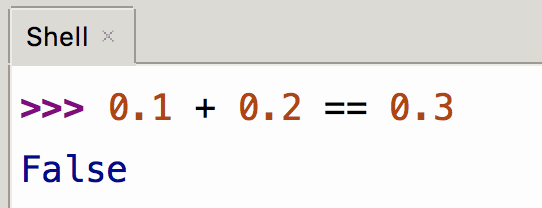

Interprétation ->


3 - Expliquer pourquoi il faut éviter d'utiliser l'opérateur de comparaison d'égalité <code> ... == ...</code> ou de différence <code> ... != ... </code> avec des opérandes de type float.  

Explication ->


4 - L'objectif de la question 4 est d'obtenir la même sortie de console que la représentation ci-dessous :  
![Boucle.png](https://nsi.erwandemerville.fr/premiere/representation_donnees/notebooks/Boucle.png)
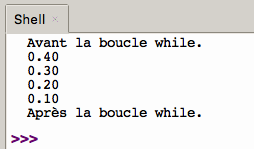

4.1 - Quel sera le problème lors de l'exécution du code ? :  
><code> print("Avant la boucle while.")
    a = 0.5  
    while a != 0.1 :
        a = a - 0.1
        print("{:3.2f}".format(a))
    print("Après la boucle while.") </code>

Explication de l'erreur ->

4.2 -  On a vu que la conversion en codage binaire d'un nombre à virgule flottante (float) était limitée dans sa précision. Compléter la condition de la boucle <code> while \<...\> : </code> dans la cellule ci-dessous, de telle sorte que l'affichage obtenu soit conforme au résultat attendu.

In [ ]:
print("Avant la boucle while.")
a = 0.5  
while < ... > :
    a = a - 0.1
    print ("{:3.2f}".format(a))
print("Après la boucle while.")

<p style="background:#BBFFFF; color:#0000FF; font-family: Verdana, Geneva, sans-serif; font-size: 1.3em">
    <b>Projet de groupe :</b>
</p> 

Déterminer une méthode d'organisation pour coder les fonctions de conversion :
- <code>float_to_bin ( ... )</code>
- <code>bin_to_float ( ... )</code>  

Si la norme IEEE 754 sur 32 bits n'est pas respectée au niveau des arguments, ces fonctions doivent retourner la valeur <code> None </code>.   

Vous pouvez effectuer ce travail en groupe, mais vous devez d'abord mettre au point votre organisation :  
- comment découper les algorithmes en sous fonctions ?
- rédiger sommairement les étapes des algorithmes sous forme de commentaires.
- quels seront les arguments en entrée et les résultats renvoyés par chacune de ces fonctions ? 
- qui fait quoi ?
- établir des tests de vérification pour valider les algorithmes (quelles peuvent être les valeurs critiques, ...)  

**Note importante : les commentaires seront indispensables dans le code Python !!!**  

Je vous conseille de faire exécuter les tests de validité par une autre personne que celle qui a implémenté l'algorithme afin d'avoir un avis sur la lisibilité de votre code.  

*Pour faire des essais ou des tests de vérification, vous pouvez aussi utiliser l'animation disnonible à l'adresse ci-dessous :   
[https://www.h-schmidt.net/FloatConverter/IEEE754.html].*

In [ ]:
# Vous pouvez créer autant de cellules que de fonctions développées ...
def fonction_1 ( ... ) :
    """ docstring """
    < ... >

In [ ]:
# Vous pouvez créer autant de cellules que de fonctions développées ...
def fonction_2 ( ... ) :
    """ docstring """
    < ... >

In [ ]:
< ... >

<span style="background:#DDEEFF; color:#0000FF; font-family: Verdana, Geneva, sans-serif; font-size: 1em">
    <b>Fonctions principales à valider pour le projet :</b>
</span> 

In [ ]:
def float_to_bin ( val:float )->list :
    """ 
    float_to_bin effectue la conversion d'un nombre à virgule flottante
    en liste de 32 bits selon l'encodage de la norme IEEE 754
    Reçoit : val -> un float 
    Renvoie : code [] -> une liste de 32 bits
    """
    < ... > 

In [ ]:
def bin_to_float ( code:list )->float :
    """ 
    bin_to_float effectue la conversion d'une liste de 32 bits 
    en nombre à virgule flottante selon l'encodage de la norme IEEE 754
    Reçoit : code [] -> une liste de 32 bits
    Renvoie : val -> un float 
    """
    < ... > 

#### Vérifications :   

<p style="font-style:italic; font-size: 0.8em">
    Note : Les espaces dans les listes de bits ne sont pas à reproduire lors de l'affichage. 
    Ils sont placés dans l'énoncé uniquement pour faciliter la lecture de la consigne.
</p>

In [ ]:
float_to_bin( 371.25 ) # sortie attendue : 
# [0, 1,0,0,0, 0,1,1,1, 0,1,1, 1,0,0,1,1, 0,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0]

In [ ]:
float_to_bin( −0.16796875 ) # sortie attendue : 
# [1, 0,1,1,1, 1,1,0,0, 0,1,0, 1,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0]

In [ ]:
bits = [0, 1,0,0,0, 0,1,1,1, 0,1,1, 1,0,0,1,1, 0,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0]
bin_to_float( bits ) # sortie attendue : 371.25

In [ ]:
bits = [1, 0,1,1,1, 1,1,0,0, 0,1,0, 1,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0]
bin_to_float( bits ) # sortie attendue : −0.16796875